Daniel Velasquez

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import inf
import math

In [ ]:
muestras= np.array(
    [[6.2206, 3.5095],
    [5.1325, 4.0181],
    [0.7597, 2.3992],
    [1.2332, 6.8391],
    [2.3995, 4.1727],
    [0.4965, 9.0272],
    [9.4479, 4.9086],
    [4.8925, 3.3772],
    [9.0005, 3.6925],
    [1.1120, 7.8025]
    ])

clases=np.array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0]);


In [ ]:
def recta(x):
    return 0 

In [ ]:
def sigmoid(z):
  return 0

In [ ]:
def f(x1, x2):
  return 0

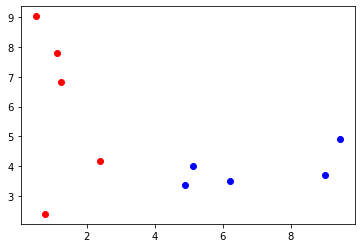

In [ ]:
fig = plt.figure()
x = np.arange(-2, 12, 0.1)
yscale = np.arange(-2, 12, 1)
xscale = np.arange(-2, 12, 1)
clase1 = muestras[np.where(clases==0), :][0]
clase2 = muestras[np.where(clases==1), :][0]

plt.scatter(clase1[:,0], clase1[:,1], c=['red'])
plt.scatter(clase2[:,0], clase2[:,1], c=['blue'])

plt.show()

1- Encontrar una función(cualquiera) de una recta que divida el conjunto de datos:

$x_2 = \theta_1 x_1 + \theta_0$

2- crear la función:

$f(x_1, x_2) = \theta_1 x_1 + \theta_0 - x_2$

3- Ubicar tres puntos en la gráfica:
a) uno por encima de la línea
b) uno sobre la línea
c) Uno por debajo de la línea

4 - ¿Cuánto da la función $f(x_1, x_2)$  en cada uno de estos puntos?

4b- En general, ¿cuańto da un punto que está por encima de la línea, uno que está sobre la línea y otro que está debajo?

5 - ¿A cuánto tiende un punto que está lejos de la línea por debajo? ¿A cuanto tiende un punto que está lejos de la línea por encima?

6 - Dibujar la gráfica z vs sigmoid(z). A cuánto tiende sigmoid cuando:


sigmoid(z) = $\frac{1}{1+e^{-z}}$


a) z tiende a infinito
b) z es cero
c) z tiene a -infinito

7 - cree una función:

 $g(x_1, x_2) = sigmoid(f(x_1, x_2))$
 
 donde $f(x_1, x_2)$ es la función creada anteriormente.

 8 - responda los puntos 4 y 5  pero en lugar de utilizar la función $f(x_1, x_2)$, utilice $g(x_1, x_2)$

 9 - entrenar un modelo utilizando sklearn Logistic Regression. Dibujar la línea encontrada por el algoritmo. 



#1. Encontrar una función(cualquiera) de una recta que divida el conjunto de datos:

$x_2 = \theta_1 x_1 + \theta_0$

In [ ]:
x1 = []
x2 = []
for i in muestras:
  x1.append(float(i[0]))
  x2.append(float(i[1]))

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(muestras, clases)

theta1 = lr.coef_[0][0]
#theta0 = lr.intercept_[0]
theta0 = lr.coef_[0][1]
print("Theta1:", theta1)
print("Theta0:", theta0)

Theta1: 1.130882456525329
Theta0: -0.2700994795131467


In [ ]:
def recta(x1,theta0,theta1):
  aux = []
  for i in x1:
    aux.append(theta1*i + theta0)
  return aux

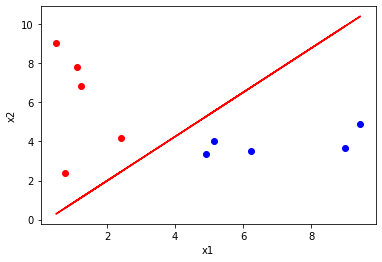

In [ ]:
x2_plot = recta(x1,theta0,theta1)

plt.scatter(clase1[:,0], clase1[:,1], c=['red'])
plt.scatter(clase2[:,0], clase2[:,1], c=['blue'])
plt.plot(x1, x2_plot, color='red')

plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

#2. Crear la función:

$f(x_1, x_2) = \theta_1 x_1 + \theta_0 - x_2$

In [ ]:
def f(x1,x2):
  aux = []
  if type(x1) == list:
    for i in range(len(x1)):
      aux.append(theta1*x1[i] + theta0 - x2[i])
  else:
    aux.append(theta1*x1 + theta0 - x2)
  return aux

#3. Ubicar tres puntos en la gráfica:
a) uno por encima de la línea

b) uno sobre la línea

c) Uno por debajo de la línea


In [ ]:
import random

In [ ]:
dotA = random.choice(x1)
ind = x1.index(dotA)
y_dotA = x2_plot[ind] + random.uniform(1, 3)
a = [dotA,y_dotA]
print("Punto a (por encima de la línea):",a)

Punto a (por encima de la línea): [6.2206, 9.290285717220852]


In [ ]:
dotB = random.choice(x1)
ind = x1.index(dotB)
y_dotB = x2_plot[ind]
b = [dotB,y_dotB]
print("Punto b (sobre la línea):",b)

Punto b (sobre la línea): [0.7597, 0.5890319227091458]


In [ ]:
dotC = random.choice(x1)
ind = x1.index(dotC)
y_dotC = x2_plot[ind] - random.uniform(1, 3)
c = [dotC,y_dotC]
print("Punto c (por debajo de la línea):",c)

Punto c (por debajo de la línea): [4.8925, 2.3063646486276195]


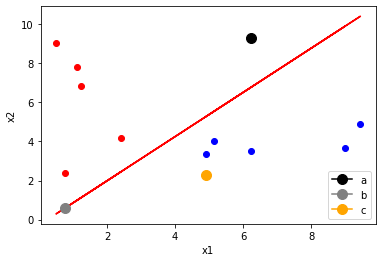

In [ ]:
plt.scatter(clase1[:,0], clase1[:,1], c=['red'])
plt.scatter(clase2[:,0], clase2[:,1], c=['blue'])
plt.plot(x1, x2_plot, color='red')
plt.plot(a[0],a[1],marker ="o", markersize=10, color="black", label='a')
plt.plot(b[0],b[1],marker ="o", markersize=10, color="grey", label='b')
plt.plot(c[0],c[1],marker ="o", markersize=10, color="orange", label='c')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.show()

#4. ¿Cuánto da la función $f(x_1, x_2)$  en cada uno de estos puntos?

En general, ¿cuańto da un punto que está por encima de la línea, uno que está sobre la línea y otro que está debajo?

In [ ]:
f(a[0],a[1])

[-2.5256177876725374]

In [ ]:
f(b[0],b[1])

[0.0]

In [ ]:
f(c[0],c[1])

[2.9563782904094067]

R// Dado lo anterior y con los puntos declarados anteriormente, se dice que, un punto por encima de la línea con la función f(x1,x2) da en un rango negativo. Un punto en la línea con la función da 0. Un punto debajo de la línea con la función da en un rango positivo.

#5. ¿A cuánto tiende un punto que está lejos de la línea por debajo? ¿A cuanto tiende un punto que está lejos de la línea por encima?

In [ ]:
dotD = random.choice(x1)
ind = x1.index(dotD)
y_dotD = x2_plot[ind] + random.uniform(30, 40)
d = [dotD,y_dotD]
print("Punto d (lejos por encima de la línea):",d)

Punto d (lejos por encima de la línea): [6.2206, 37.81855610876123]


In [ ]:
dotE = random.choice(x1)
ind = x1.index(dotE)
y_dotE = x2_plot[ind] - random.uniform(30, 40)
e = [dotE,y_dotE]
print("Punto e (lejos por debajo de la línea):",e)

Punto e (lejos por debajo de la línea): [0.7597, -35.66989045460741]


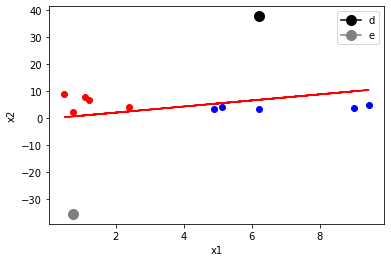

In [ ]:
plt.scatter(clase1[:,0], clase1[:,1], c=['red'])
plt.scatter(clase2[:,0], clase2[:,1], c=['blue'])
plt.plot(x1, x2_plot, color='red')
plt.plot(d[0],d[1],marker ="o", markersize=10, color="black", label='d')
plt.plot(e[0],e[1],marker ="o", markersize=10, color="grey", label='e')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.show()

In [ ]:
print("El punto", d ,"lejano por encima de la linea tiende a:",f(d[0],d[1]))

El punto [6.2206, 37.81855610876123] lejano por encima de la linea tiende a: [-31.053888179212912]


In [ ]:
print("El punto", e ,"lejano por debajo de la linea tiende a:",f(e[0],e[1]))

El punto [0.7597, -35.66989045460741] lejano por debajo de la linea tiende a: [36.25892237731656]


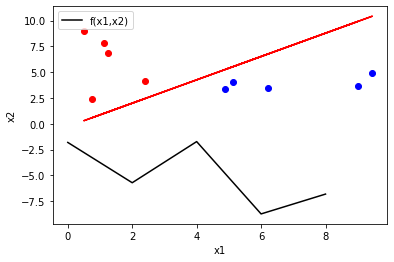

In [ ]:
xx = list(np.arange(0,10,2))
yy = f(list(clase1[:,0]),list(clase1[:,1]))
plt.scatter(clase1[:,0], clase1[:,1], c=['red'])
plt.scatter(clase2[:,0], clase2[:,1], c=['blue'])
plt.plot(xx,yy, c='black', label='f(x1,x2)')
plt.plot(x1, x2_plot, color='red')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.show()

#6. Dibujar la gráfica z vs sigmoid(z). A cuánto tiende sigmoid cuando:


sigmoid(z) = $\frac{1}{1+e^{-z}}$


a) z tiende a infinito

b) z es cero

c) z tiene a -infinito

In [ ]:
def sigmoid(z):
  sigmoid = 1 / (1 + math.exp(-z))
  return sigmoid

In [ ]:
list_x = list(np.arange(-10,10,0.1))
list_y = []
for i in list_x:
  list_y.append(sigmoid(i))

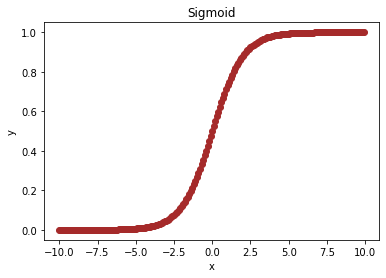

In [ ]:
plt.title('Sigmoid')
plt.scatter(list_x, list_y, c=['brown'])

plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [ ]:
print("Cuando z es cero:",sigmoid(0))

Cuando z es cero: 0.5


R// Dada la gráfica se puede decir que:

a) Cuando z tiende a infinito sigmoid tiende a 1.

b) Cuando z es cero tiende sigmoid a 0.5.

c) Cuando z tiende a -infinito sigmoid tiende a 0.